In [2]:
using DataFrames
using Plots

In [3]:
type NNparams
    a::Array{Float64}
end 
toyparams = NNparams([rand(),rand(),rand()])

NNparams([0.744243, 0.077576, 0.530675])

In [4]:
function σ(z::Float64)
    return 1.0 / (1.0 + exp(-z))
end
σ(.5)

0.6224593312018546

In [5]:
function updateNNparams(gradient::Array{Float64,1}, 
                        params::NNparams, learning_rate::Float64)
   params.a = params.a - gradient*learning_rate
    return params
end
#test
toyparams = NNparams([rand(),rand(),rand()])
grad = ∇(x,y,toyparams)
updateNNparams(grad,toyparams,.5)

LoadError: [91mUndefVarError: ∇ not defined[39m

In [6]:
function printNNparam(param::NNparams)
    @printf("PrintNN ==> %f %f %f\n", param.a[1], param.a[2], param.a[3])
    return
end

printNNparam (generic function with 1 method)

In [7]:
function output(params::NNparams, x::Array{Float64,1})
    #nb_data = size(x[1,:])
    #for i = 1:nb_data
    #x = x[i, :]
    return σ(dot(params.a,x))
    #end
end 

output (generic function with 1 method)

In [8]:
function loss(params::NNparams, yi::Array{Float64,1}, 
                x::Array{Float64,2})
    nb_data = size(x)[1]
     y_pred = zeros(length(yi))
    @assert(size(x)[1]== length(yi))
   for i = 1:nb_data
        y_pred[i]= output(params,x[i,:])
    end
    return sum(yi.*log.(1e-7+y_pred) .+ (1-yi).*log.(1e-7+1-y_pred))
end

loss (generic function with 1 method)

In [9]:
#gradient 
function ∇(x::Array{Float64,2},y::Array{Float64,1}, params::NNparams)
    grad = [0.0 for i=1:size(x)[2]]
    nb_data = size(x)[1]
    for i = 1:nb_data
        xi = x[i, :]
        yi = y[i]
        y_pred = output(params, xi)
        grad = grad .+ xi.*(yi - y_pred)
    end
    grad = grad/ nb_data
    return grad::Array{Float64,1}
end

∇ (generic function with 1 method)

In [10]:
function convertdata_to_array(dtf::DataFrame)
    nb_data = size(dtf)[1]
        x = zeros(Float64, nb_data, 3)
        
        x[:,1] = dtf[:x1]
        x[:,2] = dtf[:x2]
        x[:,3] = ones(Float64,size(x)[1])
        
        y = convert(Array, dtf[:y]) * 1.0
        #x = convert(Array, df[:x1], df[:x2], ones(Float64, size(x)[1]))
        return x,y
    end

convertdata_to_array (generic function with 1 method)

In [11]:
function init_params(x::Array{Float64,2})
    return [rand() for i = 1:size(x[1, :])[1]]
    end 
test = init_params(rand(4,4))
x= rand(5,5)
test

4-element Array{Float64,1}:
 0.540712
 0.766345
 0.460595
 0.38825 

In [12]:
function select_trainingdata(x::Array{Float64,2}, y::Array{Float64,1}, batch_size::Int)
    nb_data = length(y)
    
    ids = [i for i = 1:nb_data]
    sampled_ids = sample(ids, batch_size)
    
    x_training = x[sampled_ids, :]
    y_training = y[sampled_ids]
    
    return x_training, y_training
end


select_trainingdata (generic function with 1 method)

In [13]:
x,y = convertdata_to_array(dtf)
testparams = init_params(x)

LoadError: [91mUndefVarError: dtf not defined[39m

In [14]:
function update_learning_rate(init_learning_rate::Float64, nb_steps::Int)
    return init_learning_rate* ((1.0)/ (1.0 + (.05*nb_steps)))
end

update_learning_rate (generic function with 1 method)

In [33]:
dtf = readtable("data.csv")
x,y = convertdata_to_array(dtf)
nb_steps = 1000

params = NNparams(init_params(x))
param_history_a1 = Float64[]
param_history_a2 = Float64[]
param_history_a3 = Float64[]
loss_history = Float64[]
output_history = Float64[]
grad_history = Float64[]
learning_rate_history = Float64[]
y_pred_a = Float64[] 


for s = 1:nb_steps  
    x_training,y_training = select_trainingdata(x,y,1000)
    grad = ∇(x_training, y_training, params)
    learning_rate = update_learning_rate(.07,s)
    params = updateNNparams(grad,params,learning_rate)
    result = output(params, x_training[s,:])
    loss_at_this_step = loss(params,y,x)
    @printf("Step %d / %d, loss = %f\n", s, nb_steps, loss_at_this_step)
    @printf("a_1 = %f, a_2 = %f, b = %f\n", params.a[1],params.a[2],
        params.a[3])
    @printf("\tgrad = %f\n", norm(grad))
    @printf("rate = %f\n",learning_rate)
    y_pred = output(params, x_training[s,:])
    #push!(param_history,params)
    push!(param_history_a1, params.a[1])
    push!(param_history_a2, params.a[2])
    push!(param_history_a3, params.a[3])
    push!(y_pred_a,y_pred)
    push!(loss_history, loss_at_this_step)
    push!(output_history,result)
    y_training_a = y_training
   
end
print

, loss = -3686.599474
, b = 0.996519
	grad = 2.611604
rate = 0.066667
, loss = -4112.307201
, b = 1.026950
	grad = 2.548732
rate = 0.063636
, loss = -4538.720175
, b = 1.057135
	grad = 2.756621
rate = 0.060870
, loss = -4918.490747
, b = 1.086689
	grad = 2.718601
rate = 0.058333
, loss = -5259.031328
, b = 1.115387
	grad = 2.768023
rate = 0.056000
, loss = -5543.962571
, b = 1.141977
	grad = 2.688131
rate = 0.053846
, loss = -5780.120454
, b = 1.167501
	grad = 2.611551
rate = 0.051852
, loss = -5988.288904
, b = 1.192795
	grad = 2.723533
rate = 0.050000
, loss = -6163.723823
, b = 1.217210
	grad = 2.695528
rate = 0.048276
, loss = -6309.355443
, b = 1.239437
	grad = 2.593626
rate = 0.046667
, loss = -6444.268242
, b = 1.262424
	grad = 2.770773
rate = 0.045161
, loss = -6555.841653
, b = 1.283136
	grad = 2.624430
rate = 0.043750
, loss = -6654.604029
, b = 1.304114
	grad = 2.640274
rate = 0.042424
, loss = -6742.977941
, b = 1.324666
	grad = 2.643549
rate = 0.041176
, loss = -6821.61902

, loss = -7782.186125
, b = 2.103196
	grad = 2.770387
rate = 0.013333
, loss = -7784.383466
, b = 2.109760
	grad = 2.730488
rate = 0.013208
, loss = -7786.500281
, b = 2.116472
	grad = 2.685221
rate = 0.013084
, loss = -7788.521924
, b = 2.122655
	grad = 2.622882
rate = 0.012963
, loss = -7790.435750
, b = 2.128781
	grad = 2.547934
rate = 0.012844
, loss = -7792.427292
, b = 2.135195
	grad = 2.714762
rate = 0.012727
, loss = -7794.380294
, b = 2.141526
	grad = 2.732015
rate = 0.012613
, loss = -7796.183854
, b = 2.147513
	grad = 2.574496
rate = 0.012500
, loss = -7797.979431
, b = 2.153435
	grad = 2.634002
rate = 0.012389
, loss = -7799.660132
, b = 2.159305
	grad = 2.521560
rate = 0.012281
, loss = -7801.545041
, b = 2.165720
	grad = 2.914732
rate = 0.012174
, loss = -7803.300686
, b = 2.171874
	grad = 2.762254
rate = 0.012069
, loss = -7804.977778
, b = 2.177845
	grad = 2.684320
rate = 0.011966
, loss = -7806.586104
, b = 2.183706
	grad = 2.620984
rate = 0.011864
, loss = -7808.20156

, loss = -7870.246218
, b = 2.498517
	grad = 2.758523
rate = 0.007527
, loss = -7870.785965
, b = 2.502305
	grad = 2.729005
rate = 0.007487
, loss = -7871.310454
, b = 2.505924
	grad = 2.664984
rate = 0.007447
, loss = -7871.852106
, b = 2.509709
	grad = 2.791254
rate = 0.007407
, loss = -7872.353122
, b = 2.513290
	grad = 2.620009
rate = 0.007368
, loss = -7872.861065
, b = 2.516969
	grad = 2.664387
rate = 0.007330
, loss = -7873.349058
, b = 2.520469
	grad = 2.616757
rate = 0.007292
, loss = -7873.863249
, b = 2.524176
	grad = 2.776320
rate = 0.007254
, loss = -7874.354239
, b = 2.527719
	grad = 2.671737
rate = 0.007216
, loss = -7874.860616
, b = 2.531366
	grad = 2.801723
rate = 0.007179
, loss = -7875.332299
, b = 2.534816
	grad = 2.669480
rate = 0.007143
, loss = -7875.800328
, b = 2.538234
	grad = 2.671189
rate = 0.007107
, loss = -7876.269002
, b = 2.541685
	grad = 2.689905
rate = 0.007071
, loss = -7876.742974
, b = 2.545294
	grad = 2.738927
rate = 0.007035
, loss = -7877.21143

, loss = -7900.088876
, b = 2.753350
	grad = 2.580759
rate = 0.005204
, loss = -7900.340550
, b = 2.755973
	grad = 2.786830
rate = 0.005185
, loss = -7900.583170
, b = 2.758515
	grad = 2.687583
rate = 0.005166
, loss = -7900.826252
, b = 2.761083
	grad = 2.715737
rate = 0.005147
, loss = -7901.053808
, b = 2.763565
	grad = 2.538041
rate = 0.005128
, loss = -7901.304258
, b = 2.766238
	grad = 2.830600
rate = 0.005109
, loss = -7901.537188
, b = 2.768727
	grad = 2.660419
rate = 0.005091
, loss = -7901.776011
, b = 2.771304
	grad = 2.761479
rate = 0.005072
, loss = -7902.008179
, b = 2.773796
	grad = 2.704276
rate = 0.005054
, loss = -7902.244168
, b = 2.776339
	grad = 2.742776
rate = 0.005036
, loss = -7902.456458
, b = 2.778672
	grad = 2.464557
rate = 0.005018
, loss = -7902.682115
, b = 2.781112
	grad = 2.681355
rate = 0.005000
, loss = -7902.909143
, b = 2.783593
	grad = 2.703896
rate = 0.004982
, loss = -7903.122767
, b = 2.785926
	grad = 2.572473
rate = 0.004965
, loss = -7903.33330

, b = 2.93890593
	grad = 2.950616
rate = 0.003977
, loss = -7915.822214
, b = 2.94091652
	grad = 2.732256
rate = 0.003966
, loss = -7915.967769
, b = 2.94289719
	grad = 2.707684
rate = 0.003955
, loss = -7916.114643
, b = 2.94490882
	grad = 2.777258
rate = 0.003944
, loss = -7916.249190
, b = 2.94678815
	grad = 2.530138
rate = 0.003933
, loss = -7916.381921
, b = 2.94861975
	grad = 2.506385
rate = 0.003922
, loss = -7916.518533
, b = 2.95052088
	grad = 2.610871
rate = 0.003911
, loss = -7916.655149
, b = 2.95242368
	grad = 2.621729
rate = 0.003900
, loss = -7916.794370
, b = 2.95432486
	grad = 2.691930
rate = 0.003889
, loss = -7916.942490
, b = 2.95636414
	grad = 2.874435
rate = 0.003878
, loss = -7917.072465
, b = 2.95817412
	grad = 2.529582
rate = 0.003867
, loss = -7917.210282
, b = 2.96014924
	grad = 2.688572
rate = 0.003857
, loss = -7917.350308
, b = 2.96208762
	grad = 2.776087
rate = 0.003846
, loss = -7917.490324
, b = 2.96401707
	grad = 2.788780
rate = 0.003836
, loss = -7917

rate = 0.002657
, loss = -7933.086199
, b = 3.21889824
	grad = 2.621369
rate = 0.002652
, loss = -7933.154666
, b = 3.22021144
	grad = 2.674591
rate = 0.002647
, loss = -7933.221242
, b = 3.22149272
	grad = 2.606301
rate = 0.002642
, loss = -7933.286644
, b = 3.22273745
	grad = 2.567602
rate = 0.002637
, loss = -7933.353692
, b = 3.22398157
	grad = 2.655448
rate = 0.002632
, loss = -7933.421869
, b = 3.22527602
	grad = 2.706589
rate = 0.002627
, loss = -7933.489144
, b = 3.22658515
	grad = 2.672197
rate = 0.002622
, loss = -7933.558557
, b = 3.22793080
	grad = 2.767589
rate = 0.002617
, loss = -7933.617881
, b = 3.22910260
	grad = 2.371261
rate = 0.002612
, loss = -7933.684113
, b = 3.23037715
	grad = 2.667563
rate = 0.002607
, loss = -7933.749087
, b = 3.23167654
	grad = 2.585908
rate = 0.002602
, loss = -7933.811725
, b = 3.23290932
	grad = 2.522828
rate = 0.002597
, loss = -7933.873802
, b = 3.23411864
	grad = 2.518953
rate = 0.002593
, loss = -7933.938935
, b = 3.23536848
	grad = 2

, loss = -7942.769381
, b = 3.42436119
	grad = 2.743614
rate = 0.001969
, loss = -7942.811287
, b = 3.42535464
	grad = 2.723951
rate = 0.001966
, loss = -7942.855398
, b = 3.42637337
	grad = 2.917308
rate = 0.001964
, loss = -7942.894912
, b = 3.42732410
	grad = 2.558868
rate = 0.001961
, loss = -7942.937335
, b = 3.42833090
	grad = 2.796301
rate = 0.001958
, loss = -7942.979330
, b = 3.42932285
	grad = 2.745928
rate = 0.001955
, loss = -7943.018879
, b = 3.43025118
	grad = 2.620510
rate = 0.001953
, loss = -7943.060132
, b = 3.43123495
	grad = 2.727236
rate = 0.001950
, loss = -7943.101866
, b = 3.43223796
	grad = 2.761794
rate = 0.001947
, loss = -7943.139877
, b = 3.43314757
	grad = 2.521043
rate = 0.001944
, loss = -7943.179978
, b = 3.43410087
	grad = 2.656521
rate = 0.001942
, loss = -7943.220614
, b = 3.43506813
	grad = 2.718675
rate = 0.001939
, loss = -7943.260643
, b = 3.43603624
	grad = 2.702522
rate = 0.001936
, loss = -7943.301480
, b = 3.43699111
	grad = 2.770542
rate = 0

, loss = -7948.548402
, b = 3.57142442
	grad = 2.503475
rate = 0.001593
, loss = -7948.575569
, b = 3.57218384
	grad = 2.558754
rate = 0.001591
, loss = -7948.604288
, b = 3.57297919
	grad = 2.724821
rate = 0.001589
, loss = -7948.633249
, b = 3.57376879
	grad = 2.768079
rate = 0.001587
, loss = -7948.660991
, b = 3.57455281
	grad = 2.639806
rate = 0.001586
, loss = -7948.689665
, b = 3.57535414
	grad = 2.732065
rate = 0.001584
, loss = -7948.718428
, b = 3.57613444
	grad = 2.758104
rate = 0.001582
, loss = -7948.746031
, b = 3.57691092
	grad = 2.622228
rate = 0.001580
, loss = -7948.773858
, b = 3.57769340
	grad = 2.669658
rate = 0.001578
, loss = -7948.802819
, b = 3.57849972
	grad = 2.797172
rate = 0.001577
, loss = -7948.831287
, b = 3.57928852
	grad = 2.761513
rate = 0.001575
, loss = -7948.858141
, b = 3.58005569
	grad = 2.591993
rate = 0.001573
, loss = -7948.886491
, b = 3.58085403
	grad = 2.721816
rate = 0.001571
, loss = -7948.914347
, b = 3.58163753
	grad = 2.706205
rate = 0

print (generic function with 46 methods)


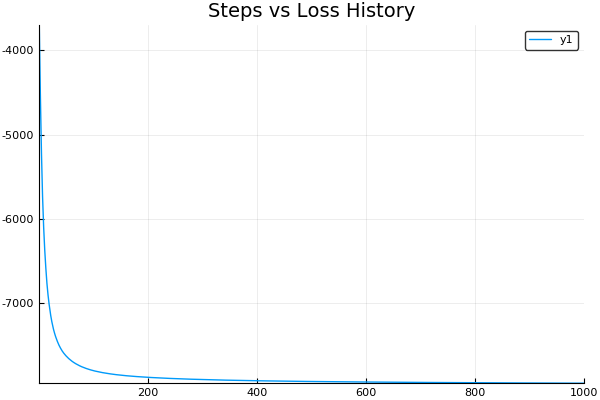

In [16]:
x = [i for i= 1:nb_steps] ; y = loss_history
plot(x,y)
title!("Steps vs Loss History")


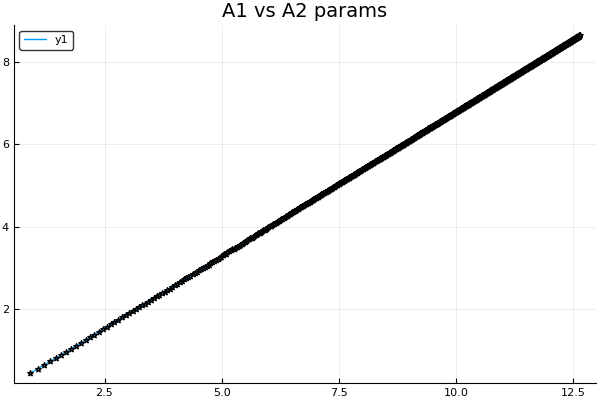

In [32]:
x = param_history_a1;
y = param_history_a2
plot(x,y,marker=:s)
title!("A1 vs A2 params")


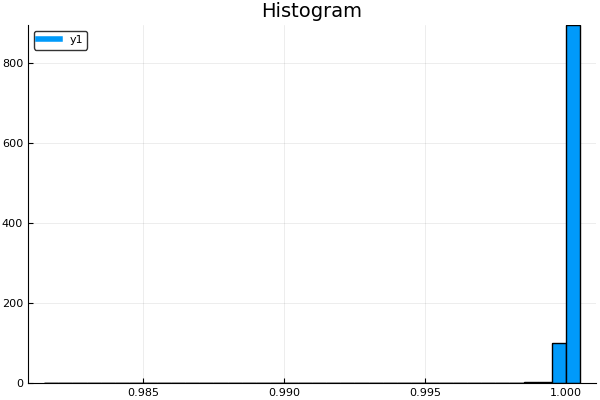

In [37]:
# Histogram of Final Output
histogram(y_pred_a, bins= 50)
title!("Histogram")


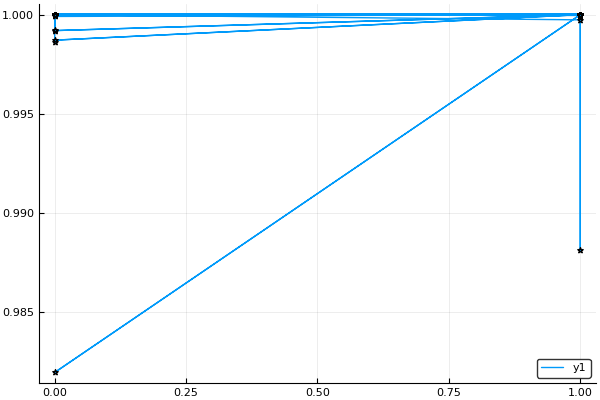

In [35]:
plot(y_training_a,y_pred_a,marker=:s)


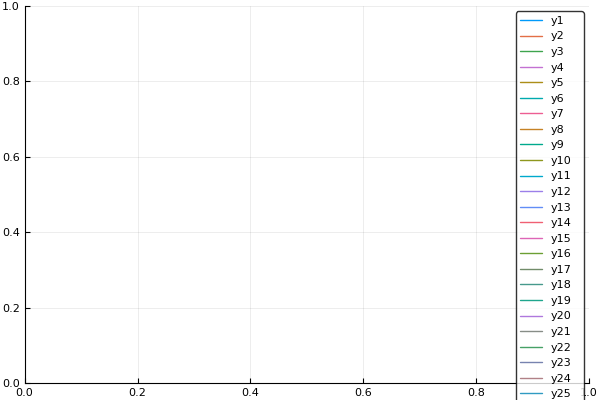

In [30]:
plot(sum(y_pred_a.==1),sum(y_training_a.==1))